In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

In [62]:
def plot_unet_eval(
    data_keys: List[str] = ['brain', 'heart'],
    architectures: List[str] = [
        'default-8', 
        'default-16', 
        'monai-16-4-4',
        'monai-16-4-8',
        'monai-32-4-4',
        'monai-64-4-4',
        'swinunetr'
    ],
):
    dfs = []
    for data in ['brain', 'heart']:
        for arch in architectures:
            dfs.append(pd.read_csv(f'../../results/unet/df_{data}_{arch}_0.csv'))

    df = pd.concat(dfs)

    # Creating the figure and axes for the subplots
    n = len(data_keys)
    fig, axes = plt.subplots(1, n, figsize=(6 * n, 6))

    # Plot for each dataset
    for i, key in enumerate(data_keys):
        sns.lineplot(
            data=df[df['Data'] == key], 
            x='Domain', 
            y='value', 
            hue='Model', 
            style='variable', 
            markers=True, 
            dashes=False, 
            markersize=10, 
            marker='x', 
            ax=axes[i]
        )
        axes[i].set_title(f'{key.capitalize()} Data')

    plt.tight_layout()

    return fig

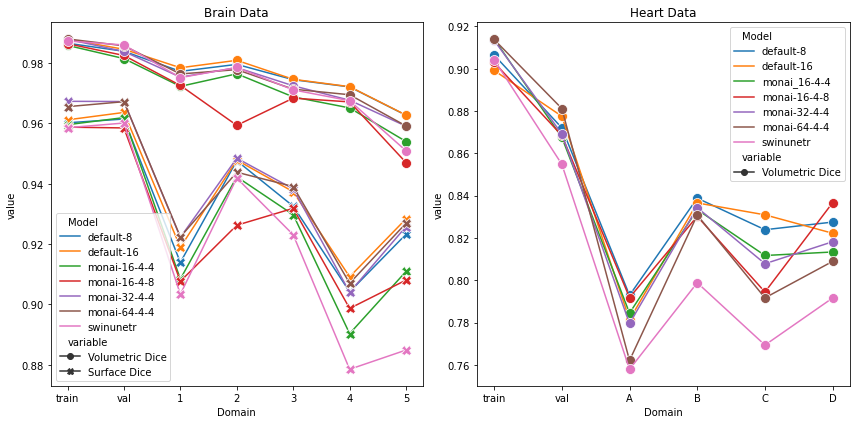

In [68]:
fig = plot_unet_eval()
fig.savefig('../../results/unet/eval_dice_unets.jpg', transparent=False,  bbox_inches='tight')

In [44]:
dfs = []
for data in ['brain', 'heart']:
    for arch in ['default-8', 'default-16', 'monai-16-4-4']:
        dfs.append(pd.read_csv(f'../../results/unet/df_{data}_{arch}_0.csv'))

df = pd.concat(dfs)

<AxesSubplot:xlabel='Domain', ylabel='value'>

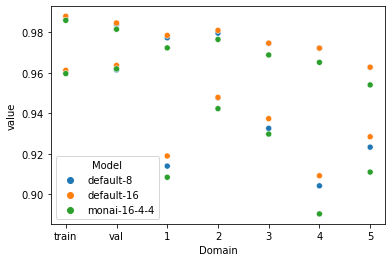

In [45]:
sns.scatterplot(data=df[df['Data']=='brain'], x='Domain', y='value', hue='Model')

<AxesSubplot:xlabel='Domain', ylabel='value'>

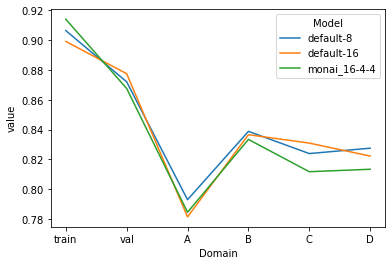

In [48]:
sns.lineplot(data=df[df['Data']=='heart'], x='Domain', y='value', hue='Model', markers='+')

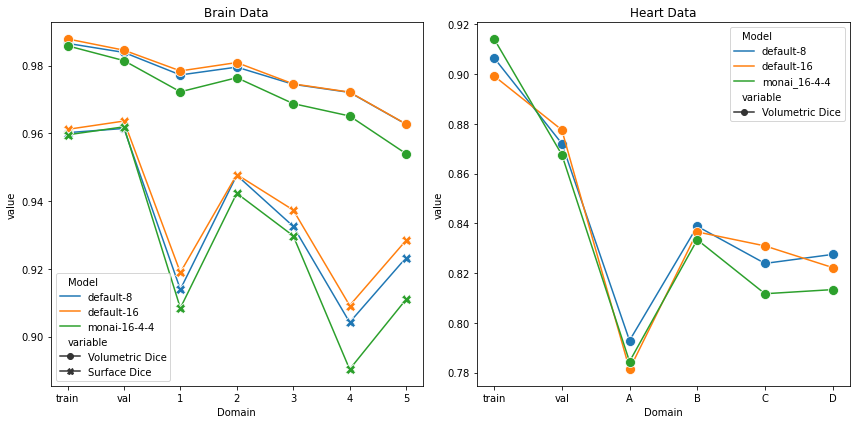

In [55]:
# Creating the figure and axes for the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for 'brain' data
sns.lineplot(
    data=df[df['Data'] == 'brain'], 
    x='Domain', 
    y='value', 
    hue='Model', 
    style='variable', 
    markers=True, 
    dashes=False, 
    markersize=10, 
    marker='x', 
    ax=axes[0]
)
axes[0].set_title('Brain Data')

# Plot for 'heart' data
sns.lineplot(
    data=df[df['Data'] == 'heart'], 
    x='Domain', 
    y='value', 
    hue='Model', 
    style='variable', 
    markers=True, 
    dashes=False, 
    markersize=10, 
    marker='x', 
    ax=axes[1]
)
axes[1].set_title('Heart Data')

# Adjusting the layout for a better fit
plt.tight_layout()

plt.show()

In [52]:
df.head()

,Domain,variable,value,Iteration,Model,Data
0,train,Volumetric Dice,0.986551,0,default-8,brain
1,val,Volumetric Dice,0.983877,0,default-8,brain
2,1,Volumetric Dice,0.977231,0,default-8,brain
3,2,Volumetric Dice,0.979541,0,default-8,brain
4,3,Volumetric Dice,0.974469,0,default-8,brain


In [2]:
def plot_dice(
    task='brain', 
    methods=['unet', 'downstream'], 
    directory="../../results-tmp/"
):    
    dfs = []
    for method in methods:
        raw = np.load(f"{directory}{task}_{method}_results.npy",allow_pickle=True).item()
        # from dict to df
        df = pd.DataFrame.from_dict(raw)
        # transform into long format for seaborn
        df_long = df.melt(ignore_index=False).reset_index()
        # rename "index" column to 'iterator'
        df_long = df_long.rename(columns={'index': 'it'})
        df_long['method'] = method
        # in case of brain data, select surface dice as measure
        if task == 'brain':
            df_long['value'] = df_long['value'].apply(lambda x: x['Volumetric Dice'])
        # concat dataframes
        dfs.append(df_long.copy(deep=True))
        
    return pd.concat(dfs)

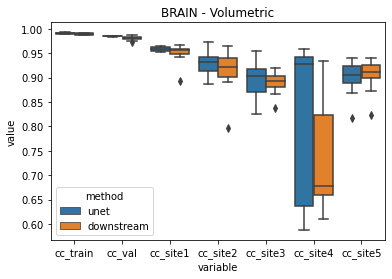

In [5]:
### config
task = 'brain'
methods = ['unet', 'downstream']
directory = "../../results-tmp/"

### data
df = plot_dice(task=task, methods=methods, directory=directory)
### plotting
sns.boxplot(data=df, x='variable', y='value', hue='method')

title = task.upper()
title = title + " - Volumetric" if task == 'brain' else title
plt.title(f"{title}")
plt.show()

In [34]:
raw = np.load(f"{directory}{task}_unet_results.npy",allow_pickle=True).item()
df = pd.DataFrame.from_dict(raw)

In [39]:
df = df.applymap(lambda x: x['Volumetric Dice'])

In [43]:
df.mean()

cc_train    0.991046
cc_val      0.985357
cc_site1    0.958675
cc_site2    0.929590
cc_site3    0.896902
cc_site4    0.816435
cc_site5    0.900862
dtype: float64

In [44]:
raw = np.load(f"{directory}{task}_unet_results.npy",allow_pickle=True).item()
df = pd.DataFrame.from_dict(raw)

In [45]:
df = df.applymap(lambda x: x['Surface Dice'])

In [46]:
df.mean()

cc_train    0.987272
cc_val      0.964324
cc_site1    0.815909
cc_site2    0.793506
cc_site3    0.804340
cc_site4    0.678126
cc_site5    0.717917
dtype: float64

In [49]:
import torch

In [52]:
torch.load('../../results-tmp/results/eval/mms/image/mms-ensemble-corr-A-9').compute()

tensor(0.1769)

In [8]:
raw = np.load(f"../../results-tmp/results/unet/metrics_calgary_unet0_augmented.npy", allow_pickle=True).item()


In [9]:
raw

{'Site train6': {'Volumetric Dice': 0.988751369493979,
  'Surface Dice': 0.9758466234232855},
 'Site validation6': {'Volumetric Dice': 0.9850827852884928,
  'Surface Dice': 0.9683884719691489},
 'Site 1': {'Volumetric Dice': 0.9766315480073293,
  'Surface Dice': 0.9237837942599463},
 'Site 2': {'Volumetric Dice': 0.9758318068214479,
  'Surface Dice': 0.946149241074357},
 'Site 3': {'Volumetric Dice': 0.9704258528083268,
  'Surface Dice': 0.9381767025037427},
 'Site 4': {'Volumetric Dice': 0.9323602080345154,
  'Surface Dice': 0.7710063669401375},
 'Site 5': {'Volumetric Dice': 0.9629966596762339,
  'Surface Dice': 0.9298640752655972}}

In [10]:
raw = np.load(f"../../results-tmp/results/unet/metrics_calgary_unet0_augmentednnUNet.npy", allow_pickle=True).item()


In [11]:
raw

{'Site train6': {'Volumetric Dice': 0.9874754327314871,
  'Surface Dice': 0.9613884207403067},
 'Site validation6': {'Volumetric Dice': 0.9842453598976135,
  'Surface Dice': 0.9629219571334149},
 'Site 1': {'Volumetric Dice': 0.9760208497444789,
  'Surface Dice': 0.8980198119273965},
 'Site 2': {'Volumetric Dice': 0.9769867230788015,
  'Surface Dice': 0.9401188361106939},
 'Site 3': {'Volumetric Dice': 0.9710984415961872,
  'Surface Dice': 0.9246045191774935},
 'Site 4': {'Volumetric Dice': 0.966572246948878,
  'Surface Dice': 0.8645183113105056},
 'Site 5': {'Volumetric Dice': 0.9547429074843724,
  'Surface Dice': 0.8854147438881637}}